<h1> The Best Neighborhoods for Expats to Live in Brussels</h1> Part 2

## Part 4. Results <a name="results"></a>

After the tour of Brussels region, we have made all of the **data collocation, clusters, folium maps, visualizations, and machining leaning analysis**, let’s check the results.

Target Analysis:
Based on the research we have done, **[house prices, neighborhood safety, school distributions, along with green space and sports facilities]** are the **key criteria** used by expats, when choosing a neighborhood to live in.

### A: Green Neighborhoods
Many expats enjoy the neighborhoods with green areas, so let's check which neighborhoods enjoy the parks most.

In [58]:
# find which neighborhoods like Park most among the top 6 most common venues
park_col=b_merged[b_merged[['1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue','4th Most Common Venue','5th Most Common Venue','6th Most Common Venue']].isin(['Park']).any(axis=1)]
park_col

Postalcode         Neighborhood       Municipalities   Latitude  Longitude  \
0        1070           Anderlecht           Anderlecht  50.828925   4.289680   
4        1040            Etterbeek            Etterbeek  50.834005   4.394064   
5        1140                Evere                Evere  50.867645   4.408936   
6        1190               Forest               Forest  50.814050   4.323961   
10       1081           Koekelberg           Koekelberg  50.862480   4.328217   
15       1180                Uccle                Uccle  50.790395   4.359918   
18       1150  Woluwe-Saint-Pierre  Woluwe-Saint-Pierre  50.833515   4.438357   

    Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0                2                  Park              Bus Stop   
4                1                 Plaza           Pizza Place   
5                2    Athletics & Sports                  Park   
6                2                  Park            Steakhouse   
10               1                   Gym                   Bar   
15               2                  Park              Bus Stop   
18               2                  Park              Bus Stop   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0            Supermarket          Tram Station                Bakery   
4            Snack Place                  Park  Gym / Fitness Center   
5           Hockey Field              Bus Stop          Tram Station   
6          Movie Theater           Supermarket             Brasserie   
10     French Restaurant                  Park    Falafel Restaurant   
15         Train Station                Office                 Trail   
18         Grocery Store      Toy / Game Store           Sports Club   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0      Convenience Store          Soccer Field                Notary   
4            Supermarket     Indian Restaurant          Concert Hall   
5                Stadium           Supermarket            Sports Bar   
6            Music Venue    Chinese Restaurant          Tennis Court   
10        Sandwich Place     Convenience Store             Piano Bar   
15     Convenience Store      Asian Restaurant                 Plaza   
18                Museum                Lounge                   Bar   

   9th Most Common Venue 10th Most Common Venue  
0    Martial Arts School              Gastropub  
4                Butcher     Chinese Restaurant  
5             Skate Park           Soccer Field  
6                 Lounge               Bus Stop  
10  Gym / Fitness Center         History Museum  
15           Escape Room      Electronics Store  
18     French Restaurant                  Trail

In [59]:
# get the array with all green neighborhoods
park_a=park_col['Neighborhood'].unique()
park_a

array(['Anderlecht', 'Etterbeek', 'Evere', 'Forest', 'Koekelberg',
       'Uccle', 'Woluwe-Saint-Pierre'], dtype=object)

Let's count how many times that each cluster ranked **park** as the top 6 most common venues. 

In [60]:
# First check the cluster which enjoys the park among the top 6 most common venues
park_v=pd.DataFrame(data=park_col['Cluster Labels'].value_counts()).reset_index()
park_v.columns=["Cluster Labels","Park Count"]
park_v

Cluster Labels  Park Count
0               2           5
1               1           2

In [61]:
# get the array with all cluster Labels: 0,1,2
a=b_merged['Cluster Labels'].unique()
a

array([2, 0, 1], dtype=int32)

In [62]:
# get a df with all labels 
labels=pd.DataFrame(data=a)
labels.columns=["Cluster Labels"]
labels=labels.sort_values(by=['Cluster Labels']).reset_index()
labels.drop(['index'],axis=1,inplace=True)
labels

Cluster Labels
0               0
1               1
2               2

In [63]:
# join labels with park_v, the cluster 0 has 0 neighborhood lists park among the top 6 most common values will stay as 0 
# get the full results each cluster has how many neighborhoods list park among the top 6 most common values.
result=pd.merge(labels,park_v,how='left',on='Cluster Labels').fillna(0)
pd.options.display.float_format='{:,.0f}'.format
result

Cluster Labels  Park Count
0               0           0
1               1           2
2               2           5

Let's visualize the results

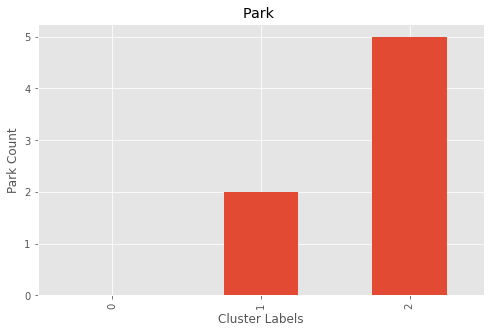

In [64]:
result['Park Count'].plot(kind='bar', figsize=(8, 5))

plt.title('Park ') # add a title to the histogram
plt.ylabel('Park Count') # add y-label
plt.xlabel('Cluster Labels') # add x-label

plt.show()

Now we can create the map to visulize the neighborhoods which enjoy the park most. <br>

In [65]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(park_col['Latitude'], park_col['Longitude'], park_col['Neighborhood'], park_col['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        legend_name='Park',
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### we can see "Cluster 2" groups enjoy the park most.

## B: Sporty Neighborhoods
Since many expats spend their leisure time in sports, let’s check which neighborhoods enjoy Gym, Soccer, Golf etc most.

In [66]:
# find which neighborhoods like Park most among the top 6 most common venues
spt_col=b_merged[b_merged[['1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue','4th Most Common Venue','5th Most Common Venue','6th Most Common Venue']].isin(['Gym','Golf','Soccer']).any(axis=1)]
spt_col

Postalcode           Neighborhood         Municipalities  Latitude  \
2        1082  Berchem-Sainte-Agathe  Berchem-Sainte-Agathe        51   
10       1081             Koekelberg             Koekelberg        51   

    Longitude  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
2           4               1      Greek Restaurant           Supermarket   
10          4               1                   Gym                   Bar   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
2           Tram Station                Notary           Snack Place   
10     French Restaurant                  Park    Falafel Restaurant   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
2                    Gym     French Restaurant            Restaurant   
10        Sandwich Place     Convenience Store             Piano Bar   

   9th Most Common Venue 10th Most Common Venue  
2                  Plaza           Burger Joint  
10  Gym / Fitness Center         History Museum

In [67]:
# get the array with all sporty neighborhoods
spt_a=spt_col['Neighborhood'].unique()
spt_a

array(['Berchem-Sainte-Agathe', 'Koekelberg'], dtype=object)

Now we can create the map to visulize the neighborhoods which enjoy the Sports most. <br>

In [68]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(spt_col['Latitude'], spt_col['Longitude'], spt_col['Neighborhood'], spt_col['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],

        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters

### we can see "Cluster 1" groups enjoy the gym most! 

## C: Gourmet Neighborhoods
Everyone loves a good restaurant, bar, or a nice coffee shop, so do expats!

Let's check which neighborhoods enjoy bars, restaurants, and coffee shops most.

In [69]:
# find which neighborhoods like Park most among the top 6 most common venues
res_col=b_merged[b_merged[['1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue','4th Most Common Venue','5th Most Common Venue','6th Most Common Venue']].isin(['Bar','Restaurant','Coffee','Brasserie']).any(axis=1)]
res_col

Postalcode           Neighborhood         Municipalities  Latitude  \
1        1160              Auderghem              Auderghem        51   
3        1000     Ville de Bruxelles     Ville de Bruxelles        51   
6        1190                 Forest                 Forest        51   
7        1083              Ganshoren              Ganshoren        51   
8        1050                Ixelles                Ixelles        51   
9        1090                  Jette                  Jette        51   
10       1081             Koekelberg             Koekelberg        51   
11       1080   Molenbeek-Saint-Jean   Molenbeek-Saint-Jean        51   
12       1060           Saint-Gilles           Saint-Gilles        51   
13       1210  Saint-Josse-ten-Noode  Saint-Josse-ten-Noode        51   
14       1030             Schaerbeek             Schaerbeek        51   
17       1200   Woluwe-Saint-Lambert   Woluwe-Saint-Lambert        51   

    Longitude  Cluster Labels 1st Most Common Venue  2nd Most Common Venue  \
1           4               0          Soccer Field                  Track   
3           4               1    Italian Restaurant         Sandwich Place   
6           4               2                  Park             Steakhouse   
7           4               1           Bus Station                    Bar   
8           4               1                   Bar  Vietnamese Restaurant   
9           4               1              Platform                    Bar   
10          4               1                   Gym                    Bar   
11          4               1           Supermarket            Pizza Place   
12          4               1             Brasserie                  Plaza   
13          4               1    Italian Restaurant           Concert Hall   
14          4               1                   Bar      French Restaurant   
17          4               1        Clothing Store              Brasserie   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
1              Brasserie          Tennis Court    Belgian Restaurant   
3                  Hotel    Belgian Restaurant       Thai Restaurant   
6          Movie Theater           Supermarket             Brasserie   
7                  Plaza              Friterie              Boutique   
8      French Restaurant    Italian Restaurant       Thai Restaurant   
9              Gastropub           Snack Place  Gym / Fitness Center   
10     French Restaurant                  Park    Falafel Restaurant   
11    Chinese Restaurant             Brasserie         Tanning Salon   
12                   Bar      Greek Restaurant           Pizza Place   
13           Pizza Place        Sandwich Place            Restaurant   
14    Turkish Restaurant          Tram Station           Snack Place   
17                 Plaza                Bakery             Bookstore   

    6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
1       French Restaurant                 Plaza                Garden   
3              Restaurant           Pizza Place                 Plaza   
6             Music Venue    Chinese Restaurant          Tennis Court   
7             Pizza Place         Deli / Bodega              Pharmacy   
8           Women's Store           Salad Place          Food Service   
9                  Bakery                  Park             Mini Golf   
10         Sandwich Place     Convenience Store             Piano Bar   
11            Pastry Shop                  Park            Food Court   
12  Portuguese Restaurant  Gym / Fitness Center             BBQ Joint   
13                  Plaza      Kebab Restaurant           Bus Station   
14            Supermarket        History Museum            Beer Store   
17           Gourmet Shop           Bus Station        Chocolate Shop   

   9th Most Common Venue 10th Most Common Venue  
1         Gymnastics Gym                 Bakery  
3    Japanese Restaurant       Asian Restaurant  
6

In [70]:
# get the array with all Restaurant neighborhoods
res_a=res_col['Neighborhood'].unique()
res_a

array(['Auderghem', 'Ville de Bruxelles', 'Forest', 'Ganshoren',
       'Ixelles', 'Jette', 'Koekelberg', 'Molenbeek-Saint-Jean',
       'Saint-Gilles', 'Saint-Josse-ten-Noode', 'Schaerbeek',
       'Woluwe-Saint-Lambert'], dtype=object)

Let's count how many times that each cluster ranked **Restaurant, Bar, Coffee shop** as the top 6 most common venues. 

In [71]:
# First check the cluster which enjoys the park among the top 6 most common venues
res_v=pd.DataFrame(data=res_col['Cluster Labels'].value_counts()).reset_index()
res_v.columns=["Cluster Labels","Restaurant Count"]
res_v

Cluster Labels  Restaurant Count
0               1                10
1               2                 1
2               0                 1

In [72]:
# join labels with park_v, the cluster 0 has 0 neighborhood lists park among the top 6 most common values will stay as 0 
# get the full results each cluster has how many neighborhoods list park among the top 6 most common values.
result2=pd.merge(labels,res_v,how='left',on='Cluster Labels').fillna(0)
pd.options.display.float_format='{:,.0f}'.format
result2

Cluster Labels  Restaurant Count
0               0                 1
1               1                10
2               2                 1

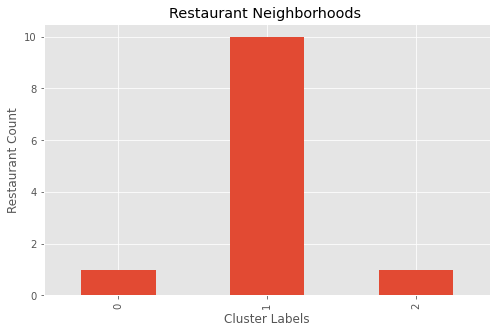

In [73]:
result2['Restaurant Count'].plot(kind='bar', figsize=(8, 5))

plt.title('Restaurant Neighborhoods ') # add a title to the histogram
plt.ylabel('Restaurant Count') # add y-label
plt.xlabel('Cluster Labels') # add x-label

plt.show()

Now we can create the map to visulize the neighborhoods which enjoy the restaurant, cafe, bar most. <br>

Now we can create the map to visulize the neighborhoods which enjoy the restaurant, cafe, bar most. <br>

In [74]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(res_col['Latitude'], res_col['Longitude'], res_col['Neighborhood'], res_col['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        legend_name='Restaurant',
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters

### The Gourmets winner is Cluster 1 again! We can clearly see that "Cluster 1" groups also enjoy the Restaurant and Bar most! 

## D: Culture Neighborhoods
A nice neighborhood with good museums, book stores, and concert halls is A plus!

Let's check which neighborhoods enjoy those culture avenues most.

In [75]:
# find which neighborhoods like culture avenues most among the top 6 most common venues
cul_col=b_merged[b_merged[['1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue','4th Most Common Venue','5th Most Common Venue','6th Most Common Venue']].isin(['Bookstore','Concert Hall','Museum']).any(axis=1)]
cul_col

Postalcode           Neighborhood         Municipalities  Latitude  \
13       1210  Saint-Josse-ten-Noode  Saint-Josse-ten-Noode        51   
17       1200   Woluwe-Saint-Lambert   Woluwe-Saint-Lambert        51   
18       1150    Woluwe-Saint-Pierre    Woluwe-Saint-Pierre        51   

    Longitude  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
13          4               1    Italian Restaurant          Concert Hall   
17          4               1        Clothing Store             Brasserie   
18          4               2                  Park              Bus Stop   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
13           Pizza Place        Sandwich Place            Restaurant   
17                 Plaza                Bakery             Bookstore   
18         Grocery Store      Toy / Game Store           Sports Club   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
13                 Plaza      Kebab Restaurant           Bus Station   
17          Gourmet Shop           Bus Station        Chocolate Shop   
18                Museum                Lounge                   Bar   

   9th Most Common Venue 10th Most Common Venue  
13     Convenience Store             Kids Store  
17              Bus Stop      French Restaurant  
18     French Restaurant                  Trail

In [76]:
# get the array with all culture neighborhoods
cul_a=cul_col['Neighborhood'].unique()
cul_a

array(['Saint-Josse-ten-Noode', 'Woluwe-Saint-Lambert',
       'Woluwe-Saint-Pierre'], dtype=object)

Now we can create the map to visulize the neighborhoods which enjoy the culture avenues most. <br>

In [77]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(cul_col['Latitude'], cul_col['Longitude'], cul_col['Neighborhood'], cul_col['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        legend_name='Restaurant',
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters

### Unbelieveable, Cluster 1 is the winner of the Culture Neighborhood again! 

## E. House Prices

House price is one of the most important criteria when people choose a neighborhood to live in, and certainly is also one of most important criteria for expats to consider also!

Let's check the neighborhoods' house prices.

In [78]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [79]:
import matplotlib as mpl
#import matplotlib.pyplot as plt

In [80]:
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.3.3


In [81]:
print(plt.style.available)
mpl.style.use(['ggplot']) # optional: for ggplot-like style

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


We got the house price 2019 in Brussels region from The Cost of Housing in Brussels, from KBC Brussels.

In [82]:
# read_csv to dataframe
bhouse = pd.read_csv('bruhouse.csv')
bhouse.head()

Neighborhoods     2018     2019 Evolution
0       Ixelles  €550.00  €635.00     15,5%
1    Schaerbeek  €350.00  €400.00     14,3%
2  Saint-Gilles  €410.00  €452.50     10,4%
3         Jette  €295.20  €323.00      9,4%
4        Forest  €395.00  €430.00      8,9%

In [83]:
bhouse.drop(columns=['Evolution'],inplace=True)
bhouse.head()

Neighborhoods     2018     2019
0       Ixelles  €550.00  €635.00
1    Schaerbeek  €350.00  €400.00
2  Saint-Gilles  €410.00  €452.50
3         Jette  €295.20  €323.00
4        Forest  €395.00  €430.00

In [84]:
# set neighborhoods as index
bhouse.set_index('Neighborhoods', inplace=True)
bhouse.head()

2018     2019
Neighborhoods                  
Ixelles        €550.00  €635.00
Schaerbeek     €350.00  €400.00
Saint-Gilles   €410.00  €452.50
Jette          €295.20  €323.00
Forest         €395.00  €430.00

let's see which neighborhoods are the most expensive neighborhoods in Brussels 2019.

In [85]:
# find the most 10 expensive neighborhoods
topbhouse=bhouse.sort_values(by=['2019'],ascending=False)
topbhouse.head(10)

2018     2019
Neighborhoods                        
Ixelles              €550.00  €635.00
Woluwe-St-Pierre     €568.00  €582.50
Etterbeek            €517.50  €542.50
Woluwe-St-Lambert    €499.00  €525.00
Uccle                €499.00  €525.00
Watermael-Boitsfort  €475.00  €492.50
Auderghem            €447.50  €468.50
Saint-Gilles         €410.00  €452.50
Forest               €395.00  €430.00
Schaerbeek           €350.00  €400.00

In [86]:
# get the array with the most expensive neighborhoods
house_a=topbhouse.reset_index()
house_a=house_a['Neighborhoods'].unique()
house_a

array(['Ixelles', 'Woluwe-St-Pierre', 'Etterbeek', 'Woluwe-St-Lambert',
       'Uccle', 'Watermael-Boitsfort', 'Auderghem', 'Saint-Gilles',
       'Forest', 'Schaerbeek', 'Bruxelles', 'Evere', 'Berchem-Ste-Agathe',
       'Laeken', 'Ganshoren', 'St-Josse-ten-Noode', 'Jette', 'Koekelberg',
       'Neder-Over-Heembeek', 'Anderlecht', 'Molenbeek-St-Jean'],
      dtype=object)

Let's focus on the first 10 most expensive neighborhoods. We can see those neighborhoods are also where the expats in favor of living, according to KBCBrussels.

In [87]:
# get top 10 most expensive neighborhoods and their house prices
topbhouse_df=bhouse.head(10)
topbhouse_df

2018     2019
Neighborhoods                      
Ixelles            €550.00  €635.00
Schaerbeek         €350.00  €400.00
Saint-Gilles       €410.00  €452.50
Jette              €295.20  €323.00
Forest             €395.00  €430.00
Woluwe-St-Lambert  €499.00  €525.00
Uccle              €499.00  €525.00
Koekelberg         €289.75  €304.00
Etterbeek          €517.50  €542.50
Auderghem          €447.50  €468.50

Next, let's visualize the house price with the top 10 most expensive in 2019 

In [88]:
# numeric data
topbhouse_df=topbhouse_df.replace({'\€':''},regex=True)
topbhouse_df

2018    2019
Neighborhoods                    
Ixelles            550.00  635.00
Schaerbeek         350.00  400.00
Saint-Gilles       410.00  452.50
Jette              295.20  323.00
Forest             395.00  430.00
Woluwe-St-Lambert  499.00  525.00
Uccle              499.00  525.00
Koekelberg         289.75  304.00
Etterbeek          517.50  542.50
Auderghem          447.50  468.50

In [89]:
topbhouse_df=topbhouse_df.apply(pd.to_numeric)

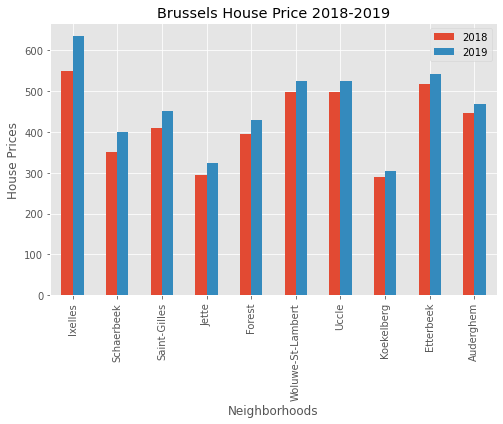

In [90]:
topbhouse_df.plot(kind='bar', figsize=(8, 5))

plt.title('Brussels House Price 2018-2019') # add a title to the histogram
plt.ylabel('House Prices') # add y-label
plt.xlabel('Neighborhoods') # add x-label

plt.show()

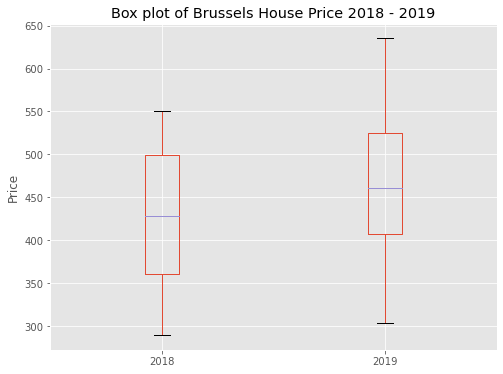

In [91]:
topbhouse_df.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Brussels House Price 2018 - 2019')
plt.ylabel('Price')

plt.show()

## F. School Distribution 

For the expats with young kids, schools are important criteria for them to choose a neighborhood to live in.

In [92]:
school=pd.read_html(r'http://www.enseignement.be/index.php?page=25932&act=search&check=&nive=110%2C111&geo_mots=&geo_type=1&geo_prov=B&geo_cp=&geo_loca=&rese=tous&opt_spe_type=#resultats')

# Checking how many tables are within the specified URL
print(len(school))

# Checking that the table I want is the first contained in the web page
school[0].head()

1


0  \
0              Ecole fondamentale Baron Louis Steens   
1               Ecole fondamentale Congrès-Dachsbeck   
2                     Ecole fondamentale Emile André   
3                  Ecole fondamentale Emile Jacqmain   
4  Ecole fondamentale annexée Gatti de Gamond - B...   

                            1     2          3           4   5  
0             Rue Haute , 255  1000  BRUXELLES  02-5100610 nan  
1  Rue de l'Enseignement , 96  1000  BRUXELLES  02-2110100 nan  
2             Rue Haute , 107  1000  BRUXELLES  02-5054130 nan  
3           Rue Véronèse , 21  1000  BRUXELLES  02-7400300 nan  
4            Rue du Canon , 9  1000  BRUXELLES  02-2177900 nan

In [93]:
# write data to a new dataframe                                                                                                           
school = pd.DataFrame(data=school[0])
school.head()

0  \
0              Ecole fondamentale Baron Louis Steens   
1               Ecole fondamentale Congrès-Dachsbeck   
2                     Ecole fondamentale Emile André   
3                  Ecole fondamentale Emile Jacqmain   
4  Ecole fondamentale annexée Gatti de Gamond - B...   

                            1     2          3           4   5  
0             Rue Haute , 255  1000  BRUXELLES  02-5100610 nan  
1  Rue de l'Enseignement , 96  1000  BRUXELLES  02-2110100 nan  
2             Rue Haute , 107  1000  BRUXELLES  02-5054130 nan  
3           Rue Véronèse , 21  1000  BRUXELLES  02-7400300 nan  
4            Rue du Canon , 9  1000  BRUXELLES  02-2177900 nan

In [94]:
school.columns=['School Name','Address','Postal Code','Neighborhood','Phone','Other']
school.head()

School Name  \
0              Ecole fondamentale Baron Louis Steens   
1               Ecole fondamentale Congrès-Dachsbeck   
2                     Ecole fondamentale Emile André   
3                  Ecole fondamentale Emile Jacqmain   
4  Ecole fondamentale annexée Gatti de Gamond - B...   

                      Address Postal Code Neighborhood       Phone  Other  
0             Rue Haute , 255        1000    BRUXELLES  02-5100610    nan  
1  Rue de l'Enseignement , 96        1000    BRUXELLES  02-2110100    nan  
2             Rue Haute , 107        1000    BRUXELLES  02-5054130    nan  
3           Rue Véronèse , 21        1000    BRUXELLES  02-7400300    nan  
4            Rue du Canon , 9        1000    BRUXELLES  02-2177900    nan

In [95]:
school=school.drop(columns=['Address','Phone','Other'])
school.head()

School Name Postal Code Neighborhood
0              Ecole fondamentale Baron Louis Steens        1000    BRUXELLES
1               Ecole fondamentale Congrès-Dachsbeck        1000    BRUXELLES
2                     Ecole fondamentale Emile André        1000    BRUXELLES
3                  Ecole fondamentale Emile Jacqmain        1000    BRUXELLES
4  Ecole fondamentale annexée Gatti de Gamond - B...        1000    BRUXELLES

In [96]:
school_ct=school["Neighborhood"].value_counts().to_frame()
school_ct=pd.DataFrame(data=school_ct)
school_ct=school_ct.reset_index()
school_ct.columns=['Neighborhood','Count']

school_ct

Neighborhood  Count
0              ANDERLECHT     39
1              SCHAERBEEK     36
2               BRUXELLES     34
3                   UCCLE     30
4    MOLENBEEK-SAINT-JEAN     27
5                  LAEKEN     22
6    WOLUWE-SAINT-LAMBERT     20
7                  FOREST     18
8                   JETTE     16
9                 IXELLES     15
10    WOLUWE-SAINT-PIERRE     12
11              ETTERBEEK     11
12           SAINT-GILLES     11
13                  EVERE     10
14  SAINT-JOSSE-TEN-NOODE      9
15              AUDERGHEM      9
16    WATERMAEL-BOITSFORT      7
17              GANSHOREN      7
18    NEDER-OVER-HEEMBEEK      5
19  BERCHEM-SAINTE-AGATHE      5
20             KOEKELBERG      5
21                  HAREN      2
22               Localité      1

In [97]:
school_ct.set_index('Neighborhood', inplace=True)
school_ct

Count
Neighborhood                
ANDERLECHT                39
SCHAERBEEK                36
BRUXELLES                 34
UCCLE                     30
MOLENBEEK-SAINT-JEAN      27
LAEKEN                    22
WOLUWE-SAINT-LAMBERT      20
FOREST                    18
JETTE                     16
IXELLES                   15
WOLUWE-SAINT-PIERRE       12
ETTERBEEK                 11
SAINT-GILLES              11
EVERE                     10
SAINT-JOSSE-TEN-NOODE      9
AUDERGHEM                  9
WATERMAEL-BOITSFORT        7
GANSHOREN                  7
NEDER-OVER-HEEMBEEK        5
BERCHEM-SAINTE-AGATHE      5
KOEKELBERG                 5
HAREN                      2
Localité                   1

In [98]:
# get the array with neighborhoods with top school numbers
school_top=school_ct.head(5)
school_a=school_top.reset_index()
school_a=school_a['Neighborhood'].unique()
school_a

array(['ANDERLECHT', 'SCHAERBEEK', 'BRUXELLES', 'UCCLE',
       'MOLENBEEK-SAINT-JEAN'], dtype=object)

Let's check the school distribution of Brussels Capital Region

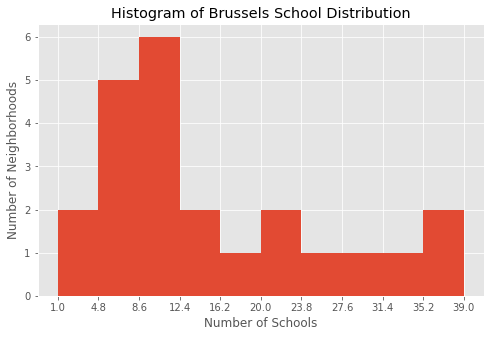

In [99]:
# 'bin_edges' is a list of bin intervals
count, bin_edges = np.histogram(school_ct['Count'])

school_ct['Count'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of Brussels School Distribution') # add a title to the histogram
plt.ylabel('Number of Neighborhoods') # add y-label
plt.xlabel('Number of Schools') # add x-label

plt.show()

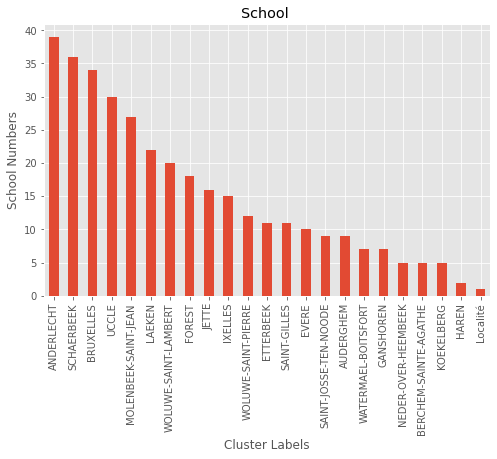

In [100]:
school_ct['Count'].plot(kind='bar', figsize=(8, 5))

plt.title('School ') # add a title to the histogram
plt.ylabel('School Numbers') # add y-label
plt.xlabel('Cluster Labels') # add x-label

plt.show()

### G.Neighboods Safety

The safety of neighborhoods is an ultra-important criterion when choosing to live in. And especially in a big international city as Brussels. 

we downloaded the Brussels crime data 2019 from BISA.brussels

In [101]:
brussels_c2019 = pd.read_csv('brusselsc_d.csv',index_col=0) #read CSV and set first column as index 

print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [102]:
brussels_c2019

Brand  Schoorsteenbranden  \
Anderlecht                        292                   7   
Oudergem                           42                   1   
Sint-Agatha-Berchem                32                   1   
Brussel                           556                   2   
Etterbeek                          84                   1   
Evere                              64                   1   
Vorst                              74                   0   
Ganshoren                          28                   1   
Elsene                            168                   6   
Jette                              98                   1   
Koekelberg                         21                   1   
Sint-Jans-Molenbeek               174                   0   
Sint-Gillis                       142                   2   
Sint-Joost-ten-Node                56                   4   
Schaarbeek                        211                   5   
Ukkel                             123                   7   
Watermaal-Bosvoorde                41                   3   
Sint-Lambrechts-Woluwe             61                   1   
Sint-Pieters-Woluwe                37                   4   
Brussels Hoofdstedelijk Gewest   2304                  48   
Buiten BHG                        118                   7   
Totaal                           2422                  55   

                                Allerlei tussen-komsten  \
Anderlecht                                          819   
Oudergem                                            197   
Sint-Agatha-Berchem                                 121   
Brussel                                            1732   
Etterbeek                                           217   
Evere                                               213   
Vorst                                               291   
Ganshoren                                           109   
Elsene                                              535   
Jette                                               239   
Koekelberg                                          103   
Sint-Jans-Molenbeek                                 478   
Sint-Gillis                                         279   
Sint-Joost-ten-Node                                 161   
Schaarbeek                                          629   
Ukkel                                               432   
Watermaal-Bosvoorde                                 105   
Sint-Lambrechts-Woluwe                              248   
Sint-Pieters-Woluwe                                 187   
Brussels Hoofdstedelijk Gewest                     7095   
Buiten BHG                                          434   
Totaal                                             7529   

                                Vals alarm \ngoed \nbedoeld  \
Anderlecht                                              230   
Oudergem                                                 91   
Sint-Agatha-Berchem                                      29   
Brussel                                                 648   
Etterbeek                                                88   
Evere                                                    56   
Vorst                                                    74   
Ganshoren                                                33   
Elsene                                                  310   
Jette                                                    73   
Koekelberg                                               22   
Sint-Jans-Molenbeek                                     144   
Sint-Gillis                                              94   
Sint-Joost-ten-Node                                      55   
Schaarbeek                                              226   
Ukkel                                                   159   
Watermaal-Bosvoorde                                      54   
Sint-Lambrechts-Woluwe                                   92   
Sint-Pieters-Woluwe                                      71   
Brussels H

In [103]:
brussels_c2=brussels_c2019['Totaal.7'].copy()
brussels_d2019=pd.DataFrame(data=brussels_c2)
brussels_d2019.reset_index(inplace=True)
brussels_d2019.columns=['Neighborhood','Total']
brussels_d2019.drop([19,20,21],inplace=True)
brussels_d2019

Neighborhood  Total
0               Anderlecht   1634
1                 Oudergem    442
2      Sint-Agatha-Berchem    260
3                  Brussel   3697
4                Etterbeek    499
5                    Evere    517
6                    Vorst    527
7                Ganshoren    269
8                   Elsene   1158
9                    Jette    537
10              Koekelberg    187
11     Sint-Jans-Molenbeek    969
12             Sint-Gillis    605
13     Sint-Joost-ten-Node    330
14              Schaarbeek   1294
15                   Ukkel    877
16     Watermaal-Bosvoorde    244
17  Sint-Lambrechts-Woluwe    540
18     Sint-Pieters-Woluwe    428

In [104]:
# Brussels latitude and longitude values
latitude = 50.8503
longitude = 4.3517

In [105]:
bru_geo = r'Belgium_4.json' # geojson doc

# Create the Choropletch map of Brussels Neighborhool Crime rate 
bru_map = folium.Map(location=[latitude, longitude], zoom_start=12)
bru_map.choropleth(
    geo_data=bru_geo,
    data=brussels_d2019,                           # datasource
    columns=['Neighborhood', 'Total'],
    key_on='feature.properties.name_4', # key on
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Brussels Neighborhood Crime Rate', # legend
    reset=True
)
bru_map # show map

In [106]:
# For the consistency, change the dutch neighborhood's names to French names
brussels_d2019=pd.concat([bru_name,brussels_d2019],axis=1) # merge with the French/Dutch name df
brussels_d2019=brussels_d2019[['French name','Total']] # replace with French name
brussels_d2019.columns=['Neighborhood','Total']
brussels_d2019

Neighborhood  Total
0              Anderlecht   1634
1               Auderghem    442
2   Berchem-Sainte-Agathe    260
3     Ville de Bruxelles*   3697
4               Etterbeek    499
5                   Evere    517
6                  Forest    527
7               Ganshoren    269
8                 Ixelles   1158
9                   Jette    537
10             Koekelberg    187
11   Molenbeek-Saint-Jean    969
12           Saint-Gilles    605
13  Saint-Josse-ten-Noode    330
14             Schaerbeek   1294
15                  Uccle    877
16    Watermael-Boitsfort    244
17   Woluwe-Saint-Lambert    540
18    Woluwe-Saint-Pierre    428

In [107]:
brussels_crm2=brussels_d2019
brussels_crm2.set_index('Neighborhood',inplace=True)
brussels_crm2

Total
Neighborhood                
Anderlecht              1634
Auderghem                442
Berchem-Sainte-Agathe    260
Ville de Bruxelles*     3697
Etterbeek                499
Evere                    517
Forest                   527
Ganshoren                269
Ixelles                 1158
Jette                    537
Koekelberg               187
Molenbeek-Saint-Jean     969
Saint-Gilles             605
Saint-Josse-ten-Noode    330
Schaerbeek              1294
Uccle                    877
Watermael-Boitsfort      244
Woluwe-Saint-Lambert     540
Woluwe-Saint-Pierre      428

In [108]:
# find the neighborhoods have the top 5 crime rates
topbcrime=brussels_crm2.sort_values(by=['Total'],ascending=False)
topbcrime=topbcrime.head(5)
topbcrime

Total
Neighborhood               
Ville de Bruxelles*    3697
Anderlecht             1634
Schaerbeek             1294
Ixelles                1158
Molenbeek-Saint-Jean    969

In [109]:
# get the array with the top crime rate neighborhoods
crm_a=topbcrime.reset_index()
crm_a=crm_a['Neighborhood'].unique()
crm_a

array(['Ville de Bruxelles*', 'Anderlecht', 'Schaerbeek', 'Ixelles',
       'Molenbeek-Saint-Jean'], dtype=object)

Ok,we can see Brussels has the top crime rates. 

Let's visualize each neighborhood's crime rate

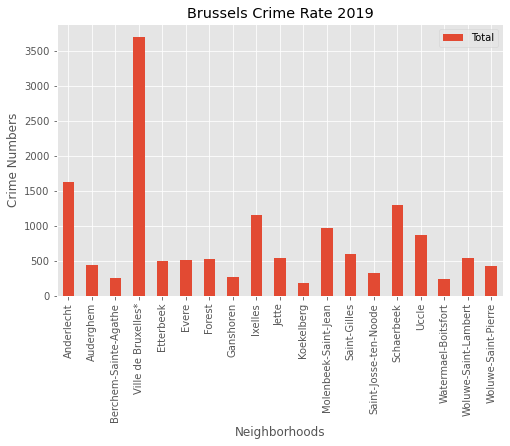

In [110]:
brussels_crm2.plot(kind='bar', figsize=(8, 5))

plt.title('Brussels Crime Rate 2019') # add a title to the histogram
plt.ylabel('Crime Numbers') # add y-label
plt.xlabel('Neighborhoods') # add x-label

plt.show()

### We can see Brussels area is a highly dense area for crime rates.

## Discussion  <a name="discussion"></a>

After a nice tour all over the 19 Brussels Municipalities neighborhood areas. What do we know now?

### A. We can see all featured neighborhoods, Green/Sporty/Gourmet/Culture neighborhoods as following:

In [111]:
bdata_n={'Neighborhoods': [park_a,spt_a,res_a,cul_a],'Custer':[2,1,1,1]}
brussels_n1=pd.DataFrame(data=bdata_n, index=['Green Neighborhoods','Sporty Neighborhoods','Gourmet Neighborhoods','Culture Neighborhoods'])
pd.set_option('max_colwidth',500)
brussels_n1

Neighborhoods  \
Green Neighborhoods                                                                                                 [Anderlecht, Etterbeek, Evere, Forest, Koekelberg, Uccle, Woluwe-Saint-Pierre]   
Sporty Neighborhoods                                                                                                                                           [Berchem-Sainte-Agathe, Koekelberg]   
Gourmet Neighborhoods  [Auderghem, Ville de Bruxelles, Forest, Ganshoren, Ixelles, Jette, Koekelberg, Molenbeek-Saint-Jean, Saint-Gilles, Saint-Josse-ten-Noode, Schaerbeek, Woluwe-Saint-Lambert]   
Culture Neighborhoods                                                                                                           [Saint-Josse-ten-Noode, Woluwe-Saint-Lambert, Woluwe-Saint-Pierre]   

                       Custer  
Green Neighborhoods         2  
Sporty Neighborhoods        1  
Gourmet Neighborhoods       1  
Culture Neighborhoods       1

### B. We know the top expensive neighorhoods in house prices.

In [112]:
bdata_h={'Neighborhoods': [house_a]}
brussels_n2=pd.DataFrame(data=bdata_h, index=['Top House Expensive Neighborhoods'])
pd.set_option('max_colwidth',500)
brussels_n2

Neighborhoods
Top House Expensive Neighborhoods  [Ixelles, Woluwe-St-Pierre, Etterbeek, Woluwe-St-Lambert, Uccle, Watermael-Boitsfort, Auderghem, Saint-Gilles, Forest, Schaerbeek, Bruxelles, Evere, Berchem-Ste-Agathe, Laeken, Ganshoren, St-Josse-ten-Noode, Jette, Koekelberg, Neder-Over-Heembeek, Anderlecht, Molenbeek-St-Jean]

### C. We know the top crime neighborhoods

In [113]:
bdata_c={'Neighborhoods': [crm_a]}
brussels_n3=pd.DataFrame(data=bdata_c, index=['Top Crime Rate Neighborhoods'])
pd.set_option('max_colwidth',500)
brussels_n3

Neighborhoods
Top Crime Rate Neighborhoods  [Ville de Bruxelles*, Anderlecht, Schaerbeek, Ixelles, Molenbeek-Saint-Jean]

### D. We know the neighborhoods with the most school choices.

In [114]:
bdata_s={'Neighborhoods': [school_a]}
brussels_n4=pd.DataFrame(data=bdata_s, index=['Neighborhoods with most school choices '])
pd.set_option('max_colwidth',500)
brussels_n4

Neighborhoods
Neighborhoods with most school choices   [ANDERLECHT, SCHAERBEEK, BRUXELLES, UCCLE, MOLENBEEK-SAINT-JEAN]

**Recommendations:**

So we hope that you already get some important insights into the neighborhoods of Brussels. 

The Green Neighborhoods are recommended  for expats who are looking for green areas Sports Neighborhoods are recommended for expats who enjoy sports activities most, and the Gourmet Neighborhoods are recommended for expats who enjoy food. Culture neighborhood are best-suited for expats who love cultural events.

Overall, Cluster 2 neighborhoods are recommended for expats based on the analysis here-above.


## Conclusion  <a name="conclusion"></a>

In this project, we analyzed the **Location Data, the House Prices, the School Distribution and the Crime Rates data** of the Brussels Region. 

We **Clustered and Segmented** all neighborhoods of Brussels Region into different Clusters. We analyzed **the most common venues of different neighborhoods**, along with the different venues categories. 

We created different ** Folium maps** with neighborhoods’ **clusters over the maps for visualization**.

We identified the **Green Neighborhoods, Sports Neighborhoods, Gourmet Neighborhoods, Culture Neighborhoods** that the expats may interested in.

We also identified **the Most Expensive Neighborhoods** as a reference for expats’ consideration, and we identified **the Top Crime Rate Neighborhoods** for safety concerns. 

We also provide Brussels Region **School Distributions** in different neighborhoods.


Our analysis provides expats a very helpful insight. Expats can benefit from our analysis, when choosing a neighborhood to live in. 

The international organizations/companies can also benefit from above analysis, e.g., the HR offices can use above info to search locations for their expats to live in. 
Of course, besides the expats, all people can benefit the above analysis, to decide which neighborhoods to live in.

<em> ***Let's end of this project and to a Happy New Year by a Data Scientist way:*** </em>

### A Welcome to Brussels WordCloud by wiki 

In [115]:
# install wordcloud
!conda install -c conda-forge wordcloud==1.4.1 --yes

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - wordcloud==1.4.1


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    wordcloud-1.4.1            |           py36_0         324 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         324 KB

The following NEW packages will be INSTALLED:

  wordcloud          conda-forge/linux-64::wordcloud-1.4.1-py36_0



wordcloud-1.4.1      | 324 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Wordcloud is installed and imported!


In [116]:
# open the file and read it into a variable brussels
brussels_t = open('brussels.txt', 'r').read()
    
print ('File downloaded and saved!')

File downloaded and saved!


In [117]:
stopwords = set(STOPWORDS)

In [118]:
# instantiate a word cloud object
brussels_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
brussels_wc.generate(brussels_t)

# display the word cloud
plt.imshow(brussels_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

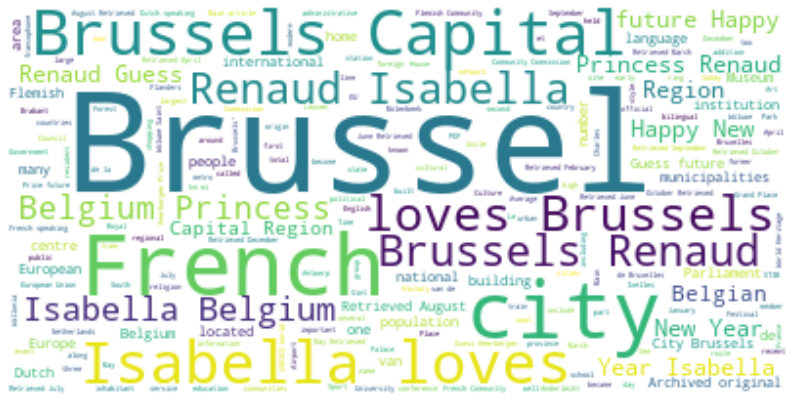

In [119]:
stopwords.add('conurbation') # add the words said to stopwords

# re-generate the word cloud
brussels_wc.generate(brussels_t)

# display the cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(brussels_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [120]:
from PIL import Image # converting images into arrays

In [121]:
# download image
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Images/alice_mask.png
    
# save mask to alice_mask
alice_mask = np.array(Image.open('alice_mask.png'))
    
print('Image downloaded and saved!')

Image downloaded and saved!


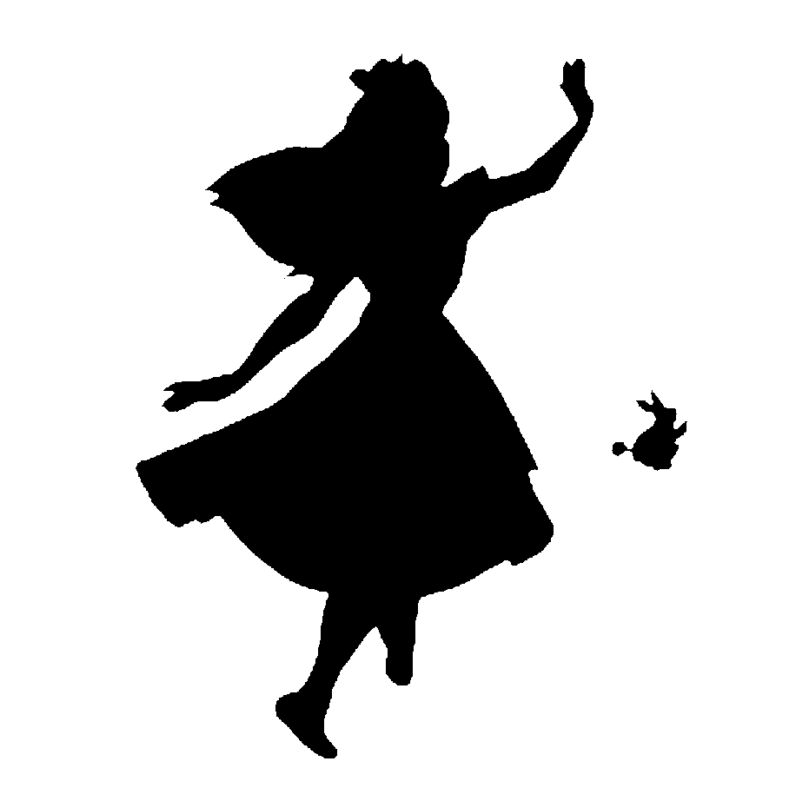

In [122]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

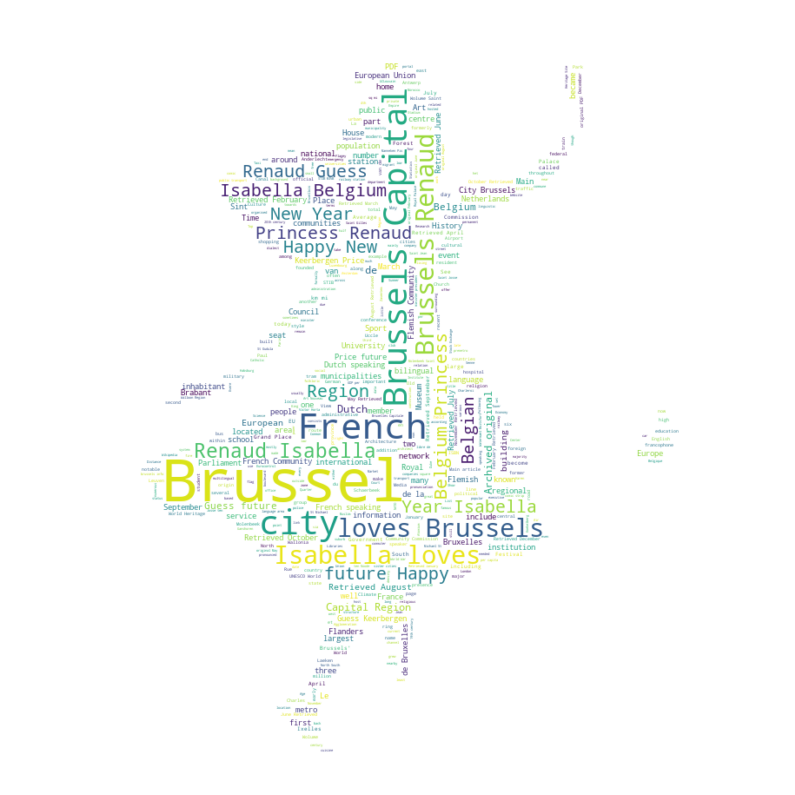

In [123]:
# instantiate a word cloud object
brussels_wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)

# generate the word cloud
brussels_wc.generate(brussels_t)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(brussels_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# To the future! and a very Happy New Year 2021!

By Elizabeth Shen 
17 Dec 2020